In [14]:
# COVID Parcel Analysis - Final Project Winter 2025
!pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("COVID_Parcel_Business.csv")

In [15]:
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# Extract unique (Year, Week, Week Start Date) combinations
week_info = df[['THE_YEAR', 'THE_WEEK', 'WEEK_START_DATE']].drop_duplicates()
week_info = week_info.sort_values(by=['THE_YEAR', 'THE_WEEK']).reset_index(drop=True)

# Optional: Save to CSV
week_info.to_csv("Week_Number_Lookup.csv", index=False)

# Preview
print(week_info.head(10))

   THE_YEAR  THE_WEEK WEEK_START_DATE
0      2018         1      2018-01-01
1      2018         2      2018-01-08
2      2018         3      2018-01-15
3      2018         4      2018-01-22
4      2018         5      2018-01-29
5      2018         6      2018-02-05
6      2018         7      2018-02-12
7      2018         8      2018-02-19
8      2018         9      2018-02-26
9      2018        10      2018-03-05


**How did the COVID-19 pandemic impact ABC Company’s parcel business?**



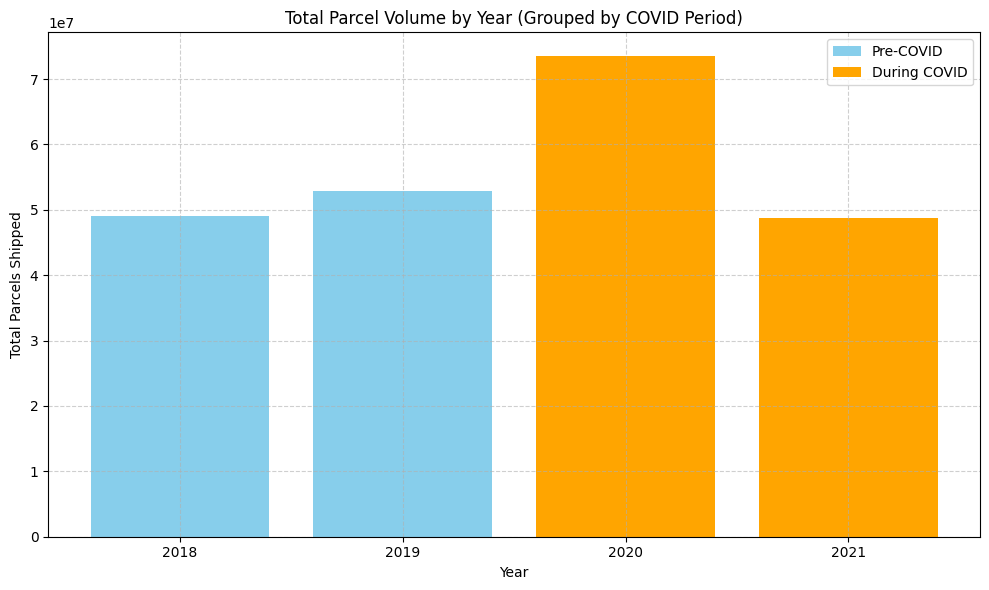

   THE_YEAR  COVID_PERIOD  Total_Volume  Avg_Weekly_Volume
0      2018     Pre-COVID      49099478         992.871431
1      2019     Pre-COVID      52823114         994.130310
2      2020  During COVID      73475690        1428.487635
3      2021  During COVID      48679668        1326.566056


In [16]:
# Calculate the ISO week start date (Monday)
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# Categorize each row into a COVID period
def classify_period(year):
    if year <= 2019:
        return 'Pre-COVID'
    elif year <= 2021:
        return 'During COVID'
    else:
        return 'Post-COVID'

df['COVID_PERIOD'] = df['THE_YEAR'].apply(classify_period)

# Group by year and COVID period, and calculate total and average volume
yearly_summary = df.groupby(['THE_YEAR', 'COVID_PERIOD'])['VOLUME'].agg(['sum', 'mean']).reset_index()
yearly_summary.rename(columns={'sum': 'Total_Volume', 'mean': 'Avg_Weekly_Volume'}, inplace=True)

# Plotting total volume per year with color-coded COVID periods
plt.figure(figsize=(10, 6))
colors = {'Pre-COVID': 'skyblue', 'During COVID': 'orange', 'Post-COVID': 'lightgreen'}
for period in yearly_summary['COVID_PERIOD'].unique():
    subset = yearly_summary[yearly_summary['COVID_PERIOD'] == period]
    plt.bar(subset['THE_YEAR'], subset['Total_Volume'], color=colors[period], label=period)

plt.title('Total Parcel Volume by Year (Grouped by COVID Period)')
plt.xlabel('Year')
plt.ylabel('Total Parcels Shipped')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_summary['THE_YEAR'])
plt.tight_layout()
plt.show()

# Display summary table
print(yearly_summary.sort_values('THE_YEAR'))

**How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?**


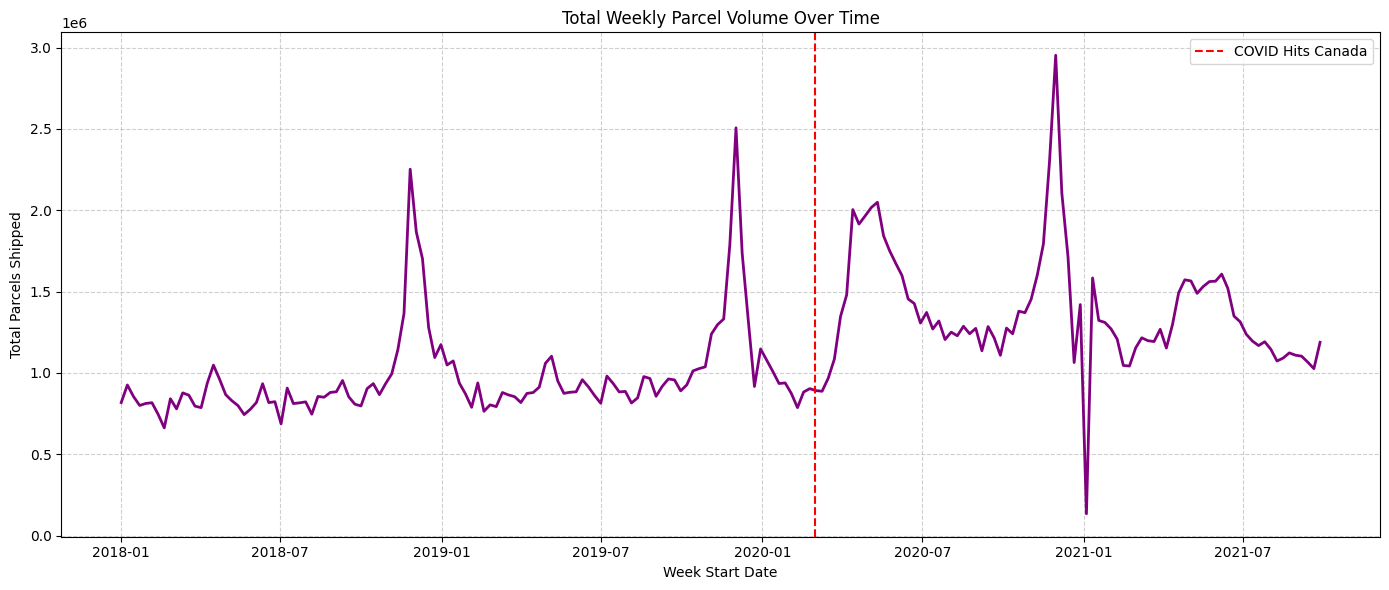

    WEEK_START_DATE   VOLUME  Volume_Change
158      2021-01-11  1583754      10.806988
47       2018-11-26  2251979       0.648507
100      2019-12-02  2506405       0.399710
119      2020-04-13  2003866       0.353829
99       2019-11-25  1790660       0.344852
156      2020-12-28  1419938       0.334871
27       2018-07-09   906682       0.319929
151      2020-11-23  2302321       0.284395
152      2020-11-30  2952342       0.282333
8        2018-02-26   841255       0.270154


In [17]:
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# Aggregate total volume per week across all customers
weekly_volume = df.groupby('WEEK_START_DATE')['VOLUME'].sum().reset_index()

# Calculate week-over-week change
weekly_volume['Volume_Change'] = weekly_volume['VOLUME'].pct_change()

# Plot weekly parcel volume as a line chart
plt.figure(figsize=(14, 6))
plt.plot(weekly_volume['WEEK_START_DATE'], weekly_volume['VOLUME'], color='purple', linewidth=2)
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='COVID Hits Canada')

plt.title('Total Weekly Parcel Volume Over Time')
plt.xlabel('Week Start Date')
plt.ylabel('Total Parcels Shipped')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: View top weeks by volume increase
top_changes = weekly_volume.sort_values(by='Volume_Change', ascending=False).head(10)
print(top_changes)

**What events within the COVID timeline may have contributed to the change?**

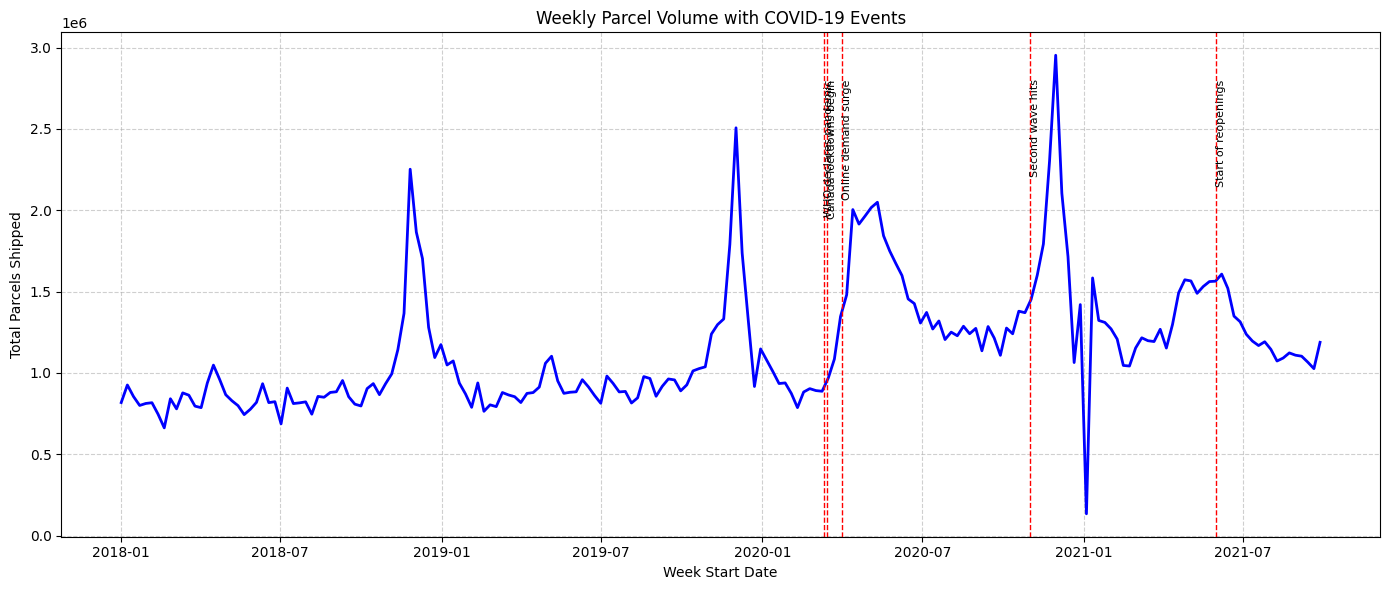

    WEEK_START_DATE   VOLUME  Volume_Change
119      2020-04-13  2003866       0.353829


In [18]:
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# Aggregate total weekly parcel volume
weekly_volume = df.groupby('WEEK_START_DATE')['VOLUME'].sum().reset_index()

# Calculate week-over-week percentage change
weekly_volume['Volume_Change'] = weekly_volume['VOLUME'].pct_change()

# Define major COVID events and their dates
covid_events = {
    '2020-03-11': 'WHO declares pandemic',
    '2020-03-15': 'Canada lockdowns begin',
    '2020-04-01': 'Online demand surge',
    '2020-11-01': 'Second wave hits',
    '2021-06-01': 'Start of reopenings'
}

# Plot the weekly volume curve
plt.figure(figsize=(14, 6))
plt.plot(weekly_volume['WEEK_START_DATE'], weekly_volume['VOLUME'], color='blue', linewidth=2)

# Annotate COVID events
for date_str, label in covid_events.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color='red', linestyle='--', linewidth=1)
    plt.text(date, weekly_volume['VOLUME'].max()*0.95, label, rotation=90, verticalalignment='top', fontsize=8)

plt.title('Weekly Parcel Volume with COVID-19 Events')
plt.xlabel('Week Start Date')
plt.ylabel('Total Parcels Shipped')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Detect first major volume change after COVID started (March 2020)
covid_start = pd.to_datetime('2020-03-01')
weekly_volume['Impact_Flag'] = (weekly_volume['WEEK_START_DATE'] >= covid_start) & (weekly_volume['Volume_Change'] > 0.25)

# Return the first week with a significant spike
first_impact = weekly_volume[weekly_volume['Impact_Flag']].head(1)
print(first_impact[['WEEK_START_DATE', 'VOLUME', 'Volume_Change']])

**How did COVID-19 impact peak season in 2020 and also 2019?**

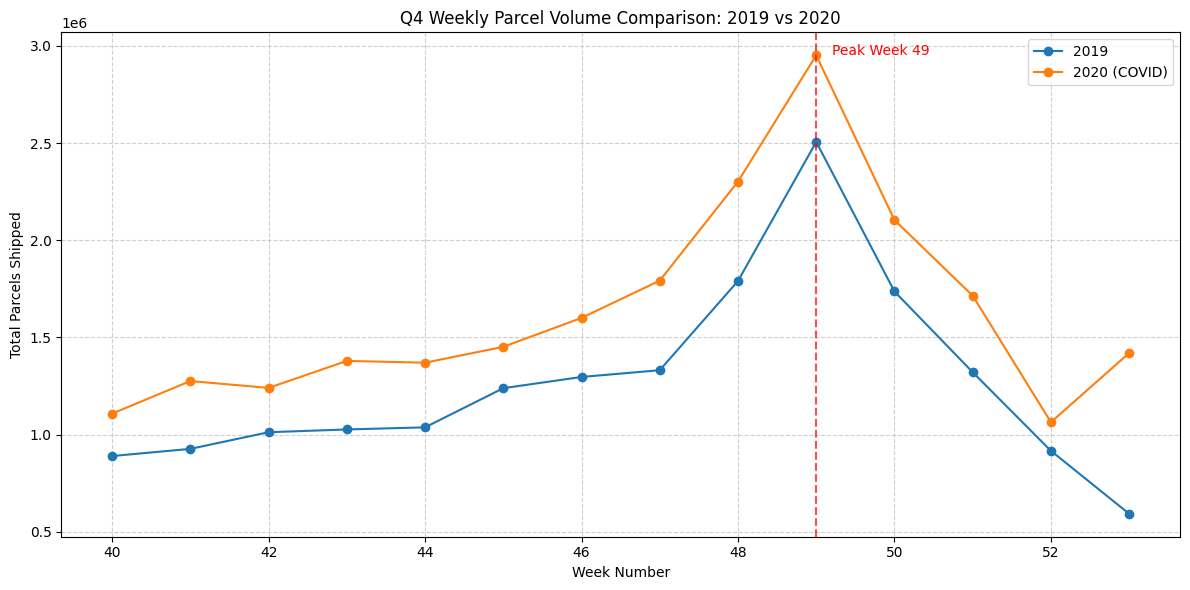

In [19]:
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# Filter for Q4 (Weeks 40–52) for 2019 and 2020
q4_data = df[(df['THE_YEAR'].isin([2019, 2020])) & (df['THE_WEEK'] >= 40)]

# Aggregate total volume by year/week
weekly_q4 = q4_data.groupby(['THE_YEAR', 'THE_WEEK'])['VOLUME'].sum().reset_index()

# Pivot for plotting
weekly_q4_pivot = weekly_q4.pivot(index='THE_WEEK', columns='THE_YEAR', values='VOLUME')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_q4_pivot.index, weekly_q4_pivot[2019], label='2019', marker='o')
plt.plot(weekly_q4_pivot.index, weekly_q4_pivot[2020], label='2020 (COVID)', marker='o')

# Highlight peak week
plt.axvline(x=49, color='red', linestyle='--', alpha=0.7)
plt.text(49.2, max(weekly_q4_pivot.max()), 'Peak Week 49', color='red')

# Labels and formatting
plt.title('Q4 Weekly Parcel Volume Comparison: 2019 vs 2020')
plt.xlabel('Week Number')
plt.ylabel('Total Parcels Shipped')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**How has COVID affected companies in the different customer groups (Enterprise, Large, etc.)?**

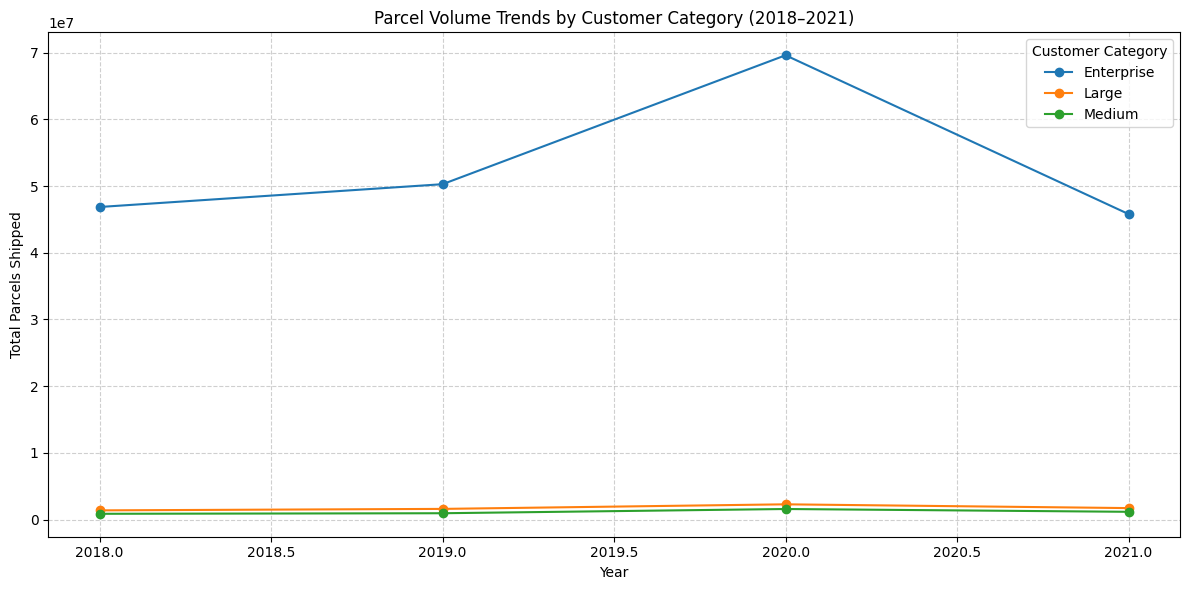

In [20]:
df = pd.read_csv("COVID_Parcel_Business.csv")

# Recalculate week start date (if not already done)
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# 1. Aggregate 2019 volume per customer to define their category
volume_2019 = df[df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum().reset_index()

# 2. Define customer category
def classify_customer(volume):
    if volume >= 9000:
        return 'Enterprise'
    elif volume >= 3000:
        return 'Large'
    elif volume >= 1000:
        return 'Medium'
    elif volume > 0:
        return 'Small'
    else:
        return 'Inactive'

# 3. Apply category classification
volume_2019['Customer_Category'] = volume_2019['VOLUME'].apply(classify_customer)

# 4. Merge category back to the original dataset
df = df.merge(volume_2019[['FakeCustomerID', 'Customer_Category']], on='FakeCustomerID', how='left')

# 5. Group by category and year to get total volume
category_trends = df.groupby(['Customer_Category', 'THE_YEAR'])['VOLUME'].sum().reset_index()

# 6. Pivot the data for visualization
category_trends_pivot = category_trends.pivot(index='THE_YEAR', columns='Customer_Category', values='VOLUME')

# 7. Plot trends
plt.figure(figsize=(12, 6))
for category in category_trends_pivot.columns:
    plt.plot(category_trends_pivot.index, category_trends_pivot[category], marker='o', label=category)

# 8. Final formatting
plt.title('Parcel Volume Trends by Customer Category (2018–2021)')
plt.xlabel('Year')
plt.ylabel('Total Parcels Shipped')
plt.legend(title='Customer Category')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**What percent of each customer group is growing, moderately growing, and declining during the COVID observation period?**

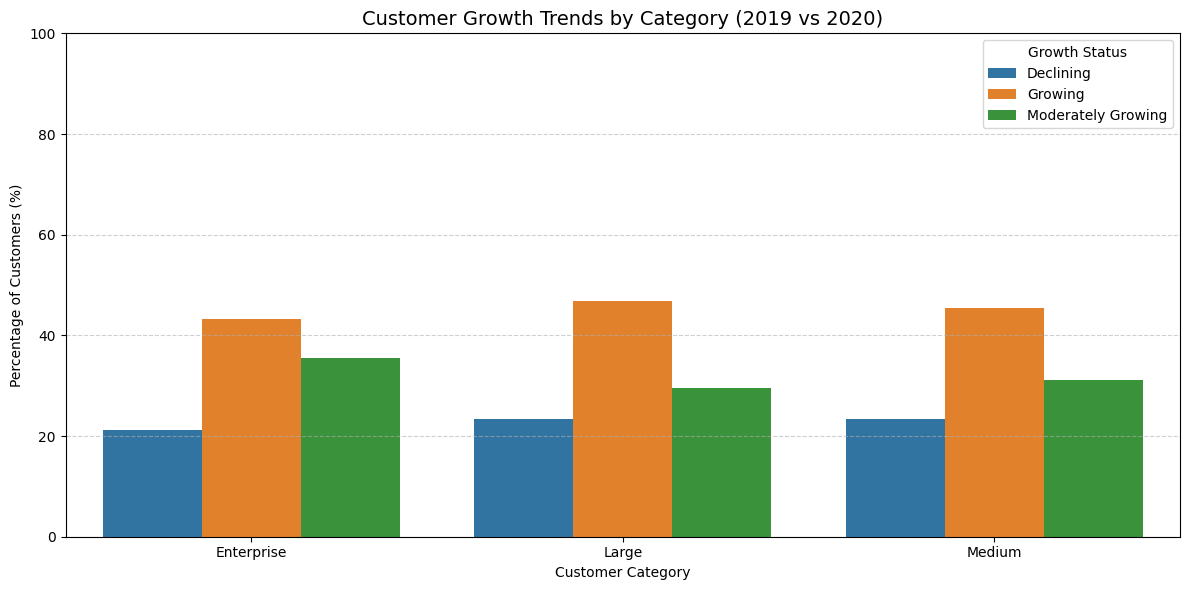

In [21]:
volume_2019 = df[df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum().reset_index()

# Define customer size categories
def classify_customer(volume):
    if volume >= 9000:
        return 'Enterprise'
    elif volume >= 3000:
        return 'Large'
    elif volume >= 1000:
        return 'Medium'
    elif volume > 0:
        return 'Small'
    else:
        return 'Inactive'

volume_2019['Customer_Category'] = volume_2019['VOLUME'].apply(classify_customer)

# Step 1: Get total volume per customer for 2019 and 2020
volume_by_year = df[df['THE_YEAR'].isin([2019, 2020])].groupby(['FakeCustomerID', 'THE_YEAR'])['VOLUME'].sum().reset_index()

# Step 2: Pivot so we get 2019 and 2020 side-by-side
volume_pivot = volume_by_year.pivot(index='FakeCustomerID', columns='THE_YEAR', values='VOLUME').fillna(0)
volume_pivot.columns = ['Volume_2019', 'Volume_2020']

# Step 3: Compute growth rate
volume_pivot['Growth_Rate'] = (volume_pivot['Volume_2020'] - volume_pivot['Volume_2019']) / volume_pivot['Volume_2019'].replace(0, 1)

# Step 4: Classify into growth categories
def growth_category(growth):
    if growth > 0.25:
        return 'Growing'
    elif -0.25 <= growth <= 0.25:
        return 'Moderately Growing'
    else:
        return 'Declining'

volume_pivot['Growth_Category'] = volume_pivot['Growth_Rate'].apply(growth_category)

# Step 5: Merge with 2019-based customer category
volume_pivot = volume_pivot.merge(volume_2019[['FakeCustomerID', 'Customer_Category']], on='FakeCustomerID', how='left')

# Step 6: Count and calculate percentages
growth_summary = volume_pivot.groupby(['Customer_Category', 'Growth_Category']).size().reset_index(name='Count')
total_per_group = volume_pivot.groupby('Customer_Category').size().reset_index(name='Total')
growth_summary = growth_summary.merge(total_per_group, on='Customer_Category')
growth_summary['Percent'] = (growth_summary['Count'] / growth_summary['Total']) * 100

# Step 7: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=growth_summary,
    x='Customer_Category',
    y='Percent',
    hue='Growth_Category'
)

plt.title('Customer Growth Trends by Category (2019 vs 2020)', fontsize=14)
plt.ylabel('Percentage of Customers (%)')
plt.xlabel('Customer Category')
plt.ylim(0, 100)
plt.legend(title='Growth Status')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**What percent of each customer group are new customers during the COVID observation period?**

In [23]:
df = pd.read_csv("COVID_Parcel_Business.csv")

# Recalculate week start date (if not already done)
df['WEEK_START_DATE'] = pd.to_datetime(
    df['THE_YEAR'].astype(str) + '-W' + df['THE_WEEK'].astype(str).str.zfill(2) + '-1',
    format='%G-W%V-%u'
)

# 1. Aggregate 2019 volume per customer to define their category
volume_2019 = df[df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum().reset_index()

# 2. Define customer category
def classify_customer(volume):
    if volume >= 9000:
        return 'Enterprise'
    elif volume >= 3000:
        return 'Large'
    elif volume >= 1000:
        return 'Medium'
    elif volume > 0:
        return 'Small'
    else:
        return 'Inactive'

# 3. Apply category classification
volume_2019['Customer_Category'] = volume_2019['VOLUME'].apply(classify_customer)

# ---  Create new_customer_summary DataFrame ---
# Assuming you want to analyze new customers in 2020 compared to 2019
customers_2019 = set(df[df['THE_YEAR'] == 2019]['FakeCustomerID'].unique())
customers_2020 = set(df[df['THE_YEAR'] == 2020]['FakeCustomerID'].unique())

new_customers_2020 = customers_2020 - customers_2019  # Customers in 2020 but not in 2019

# Create a DataFrame to store the summary
new_customer_summary = pd.DataFrame(index=volume_2019['Customer_Category'].unique())


# ---  Continue with your analysis ---

if 'New_Customers' not in new_customer_summary.columns:
    new_customer_summary['New_Customers'] = 0
if 'Existing_Customers' not in new_customer_summary.columns:
    new_customer_summary['Existing_Customers'] = 0

# Recalculate total and percentage
new_customer_summary['Total_Customers'] = (
    new_customer_summary['Existing_Customers'] + new_customer_summary['New_Customers']
)
new_customer_summary['Percent_New_Customers'] = (
    new_customer_summary['New_Customers'] / new_customer_summary['Total_Customers']
) * 100

# Reset index for clean table
new_customer_summary.reset_index()

,index,New_Customers,Existing_Customers,Total_Customers,Percent_New_Customers
0,Medium,0,0,0,NaN
1,Large,0,0,0,NaN
2,Enterprise,0,0,0,NaN


**What percent of 2019 customers in each group did we lose during the COVID observation period?**

<ipython-input-24-eb456b28f405>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


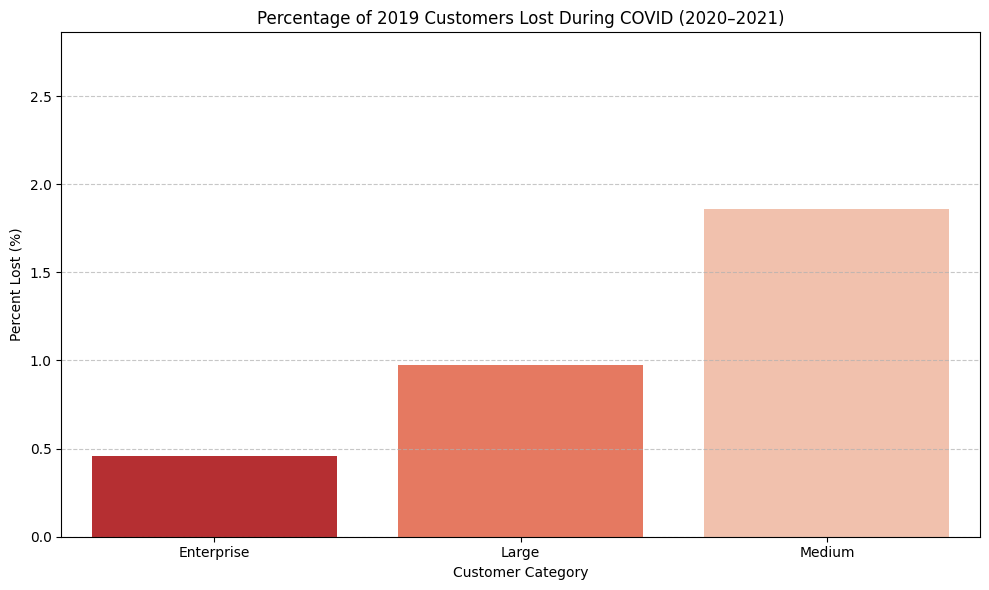

In [24]:
def classify_customer(volume):
    if volume >= 9000:
        return 'Enterprise'
    elif volume >= 3000:
        return 'Large'
    elif volume >= 1000:
        return 'Medium'
    elif volume > 0:
        return 'Small'
    else:
        return 'Inactive'

# Step 1: Customers active in 2019 with total volume and classification
volume_2019 = df[df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum().reset_index()
volume_2019['Customer_Category'] = volume_2019['VOLUME'].apply(classify_customer)

# Step 2: Identify customers active in COVID period (2020 or 2021)
customers_covid_set = set(df[df['THE_YEAR'].isin([2020, 2021])]['FakeCustomerID'].unique())

# Step 3: Flag if 2019 customer is lost in COVID period
volume_2019['Is_Lost'] = ~volume_2019['FakeCustomerID'].isin(customers_covid_set)

# Step 4: Summarize lost and retained customers
lost_summary = volume_2019.groupby(['Customer_Category', 'Is_Lost']).size().unstack(fill_value=0)

# Ensure both columns exist
if True not in lost_summary.columns:
    lost_summary[True] = 0
if False not in lost_summary.columns:
    lost_summary[False] = 0

# Rename for clarity
lost_summary = lost_summary.rename(columns={False: 'Retained_Customers', True: 'Lost_Customers'})

# Calculate total and percent lost
lost_summary['Total_Customers'] = lost_summary['Retained_Customers'] + lost_summary['Lost_Customers']
lost_summary['Percent_Lost_Customers'] = (
    lost_summary['Lost_Customers'] / lost_summary['Total_Customers']
) * 100

# Reset index for clean DataFrame
lost_summary = lost_summary.reset_index()

# --- Optional: Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lost_summary,
    x='Customer_Category',
    y='Percent_Lost_Customers',
    palette='Reds_r'
)
plt.title("Percentage of 2019 Customers Lost During COVID (2020–2021)")
plt.ylabel("Percent Lost (%)")
plt.xlabel("Customer Category")
plt.ylim(0, lost_summary['Percent_Lost_Customers'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**What was the overall impact of COVID on volumes and revenue by customer group**

In [28]:
def classify_customer(volume):
    if volume >= 9000:
        return 'Enterprise'
    elif volume >= 3000:
        return 'Large'
    elif volume >= 1000:
        return 'Medium'
    elif volume > 0:
        return 'Small'
    else:
        return 'Inactive'

# Define flat rates and discounts per category
rates = {
    'Enterprise': 5.00,
    'Large': 5.50,
    'Medium': 6.00,
    'Small': 6.50
}

discounts = {
    'Enterprise': 0.20,
    'Large': 0.15,
    'Medium': 0.10,
    'Small': 0.05
}

# Step 1: Classify customers based on 2019 total volume
volume_2019 = df[df['THE_YEAR'] == 2019].groupby('FakeCustomerID')['VOLUME'].sum().reset_index()
volume_2019['Customer_Category'] = volume_2019['VOLUME'].apply(classify_customer)

# Step 2: Merge classification back into the full dataset
# Use suffixes to avoid duplicate column names during the merge
df_merged = df.merge(volume_2019[['FakeCustomerID', 'Customer_Category']], on='FakeCustomerID', how='left')

# Step 4: Filter by time period
df_pre_covid = df_merged[df_merged['THE_YEAR'] == 2019]
df_covid = df_merged[df_merged['THE_YEAR'].isin([2020, 2021])]

# Step 5: Revenue computation function
def compute_revenue(group):
    category = group.name
    rate = rates.get(category, 0)
    discount = discounts.get(category, 0)
    total_volume = group['VOLUME'].sum()
    revenue = total_volume * rate * (1 - discount)
    return pd.Series({'Total_Volume': total_volume, 'Total_Revenue': revenue})

# Step 6: Group and calculate metrics
pre_covid_summary = df_pre_covid.groupby('Customer_Category').apply(compute_revenue)
covid_summary = df_covid.groupby('Customer_Category').apply(compute_revenue)

# Step 7: Combine both periods into one summary table
impact_summary = pre_covid_summary.join(covid_summary, lsuffix='_2019', rsuffix='_COVID')
impact_summary = impact_summary.reset_index()

# Step 8: Display the result
print(impact_summary)

  Customer_Category  Total_Volume_2019  Total_Revenue_2019  \
0        Enterprise         50283132.0        2.011325e+08   
1             Large          1595498.0        7.458953e+06   
2            Medium           944484.0        5.100214e+06   

   Total_Volume_COVID  Total_Revenue_COVID  
0         115419897.0          461679588.0  
1           3997860.0           18689995.5  
2           2737601.0           14783045.4  


<ipython-input-28-b00c2ee07ddf>:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pre_covid_summary = df_pre_covid.groupby('Customer_Category').apply(compute_revenue)
<ipython-input-28-b00c2ee07ddf>:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  covid_summary = df_covid.groupby('Customer_Category').apply(compute_revenue)
